## Курсовой проект по курсу "Интерпретируемый ИИ и майнинг данных"
### Часть 1: Работа с табличными данными
### Этап 3.1: Построение моделей: Нейронная сеть MLPClassifier

**Материалы к проекту (файлы):**<br>
* X_train.csv/y_train.csv - тренировочная выборка<br>
* X_test.csv/y_test.csv - тестовая выборка<br>

**Целевая переменная:**
HeartDisease: output class [1: heart disease, 0: Normal]

**Описание датасета:**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Атрибуты:**
1. Age: age of the patient [years] - **Возраст**
2. Sex: sex of the patient [M: Male, F: Female] - **Пол**
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] - **Тип боли в груди**
4. RestingBP: resting blood pressure [mm Hg] - **Артериальное давление в покое**
5. Cholesterol: serum cholesterol [mm/dl] - **Холестерин** 
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] - **Уровень сахара в крови натощак**
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] - **ЭКГ в покое**
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] - **Максимальная частота сердечных сокращений**
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No] - **Стенокардия, вызванная физической нагрузкой**
10. Oldpeak: oldpeak = ST [Numeric value measured in depression] - **ST в покое**
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] - **ST при пиковой нагрузке**
12. HeartDisease: output class [1: heart disease, 0: Normal] - **Сердечный приступ**

## Шаг 1: Подготовка инструментов

### 1.1 Необходимые модули и функции

In [1]:
import dill
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))

### 1.2 Загрузка пайплайна препроцессинга

In [3]:
with open('prep_with_cat.dill', 'rb') as prep_cat_pipeline:
    prep_cat = dill.load(prep_cat_pipeline)

### 1.3 Загрузка данных

In [4]:
TRAIN_DATA_PATH = 'data/X_train.csv'
TRAIN_TARGET_PATH = 'data/y_train.csv'

TEST_DATA_PATH = 'data/X_test.csv'
TEST_TARGET_PATH = 'data/y_test.csv'

In [5]:
train_base = pd.read_csv(TRAIN_DATA_PATH)
train = train_base.copy()
train_target_base = pd.read_csv(TRAIN_TARGET_PATH)
train_target = train_target_base.copy()
display(train.shape, train_target.shape)

(641, 11)

(641, 1)

In [6]:
test_base = pd.read_csv(TEST_DATA_PATH)
test = test_base.copy()
test_target_base = pd.read_csv(TEST_TARGET_PATH)
test_target = test_target_base.copy()
display(test.shape, test_target.shape)

(276, 11)

(276, 1)

## Шаг 2: Построение модели

### 2.1 Baseline

Обучим модель с параметрами по умолчанию на тренировочной выборке.

In [7]:
classifier = Pipeline([
    ('preprocessing', prep_cat),
    ('classifier', MLPClassifier(random_state = 0)),
])

classifier.fit(train, train_target)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('minmax',
                                                                                    MinMaxScaler())]),
                                                                   ['Age',
                                                                    'RestingBP',
                                                                    'Cholesterol',
                                                                    'FastingBS',
                                                                    'MaxHR',
                                                                    'Oldpeak']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('ohe',
  

Проверим качество полученного бейзлайна.

In [8]:
train_pred_proba = classifier.predict_proba(train)
train_pred = classifier.predict(train)
test_pred_proba = classifier.predict_proba(test)
test_pred = classifier.predict(test)
print(f'Train ROC_AUC: {roc_auc_score(train_target, train_pred_proba.T[1])}')
print(f'Train F1 SCORE: {f1_score(train_target, train_pred)}')
print(f'Test ROC_AUC: {roc_auc_score(test_target, test_pred_proba.T[1])}')
print(f'Test F1 SCORE: {f1_score(test_target, test_pred)}')

Train ROC_AUC: 0.9458946042244926
Train F1 SCORE: 0.8966480446927375
Test ROC_AUC: 0.9454274934906212
Test F1 SCORE: 0.8620689655172414


In [9]:
get_classification_report(train_target['HeartDisease'], train_pred, test_target['HeartDisease'], test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       287
           1       0.89      0.91      0.90       354

    accuracy                           0.88       641
   macro avg       0.88      0.88      0.88       641
weighted avg       0.88      0.88      0.88       641

TEST

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       123
           1       0.91      0.82      0.86       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



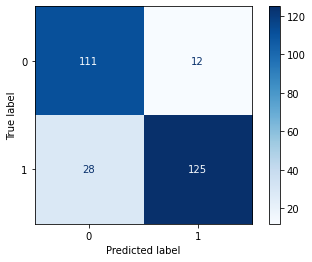

In [10]:
plot_confusion_matrix(classifier, test, test_target['HeartDisease'], cmap=plt.cm.Blues);

### 2.2 Подбор гиперпараметров

Гиперпараметры подбираем с помощью GridSearchCV с кроссвалидацией на 5 фолдов.

In [11]:
%%time
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

frozen_params = {
    'random_state': 0
}
parameters = {
    'solver': ['lbfgs', 'sgd', 'adam'], 
    'max_iter': [500, 1000, 1500, 2000], 
    'alpha': 10.0 ** -np.arange(1, 10), 
    'hidden_layer_sizes':np.arange(5, 15),
    'learning_rate': ['adaptive', 'constant', 'invscaling']
}

clf = GridSearchCV(MLPClassifier(**frozen_params), parameters, n_jobs=-1, verbose=3, scoring='f1' ,cv=cv)

classifier = Pipeline([
    ('preprocessing', prep_cat),
    ('classifier', clf),
])
classifier.fit(train, train_target)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

CPU times: user 1min 35s, sys: 4.52 s, total: 1min 39s
Wall time: 1h 28min 25s


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('minmax',
                                                                                    MinMaxScaler())]),
                                                                   ['Age',
                                                                    'RestingBP',
                                                                    'Cholesterol',
                                                                    'FastingBS',
                                                                    'MaxHR',
                                                                    'Oldpeak']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('ohe',
  

### 2.3 Итоговая модель

Обучим модель с лучшими параметрами на тренировочной выборке и посмотрим итоговое качество на тестовой выборке.

In [12]:
print(clf.best_score_)
print(clf.best_params_)

0.8740204027346126
{'alpha': 0.1, 'hidden_layer_sizes': 9, 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'sgd'}


In [13]:
classifier = Pipeline([
    ('preprocessing', prep_cat),
    ('classifier', MLPClassifier(**clf.best_params_, random_state = 0)),
])
classifier.fit(train, train_target)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('minmax',
                                                                                    MinMaxScaler())]),
                                                                   ['Age',
                                                                    'RestingBP',
                                                                    'Cholesterol',
                                                                    'FastingBS',
                                                                    'MaxHR',
                                                                    'Oldpeak']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('ohe',
  

In [14]:
train_pred_proba = classifier.predict_proba(train)
train_pred = classifier.predict(train)
test_pred_proba = classifier.predict_proba(test)
test_pred = classifier.predict(test)

In [15]:
get_classification_report(train_target['HeartDisease'], train_pred, test_target['HeartDisease'], test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       287
           1       0.86      0.89      0.87       354

    accuracy                           0.86       641
   macro avg       0.86      0.85      0.85       641
weighted avg       0.86      0.86      0.86       641

TEST

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       123
           1       0.92      0.85      0.88       153

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276



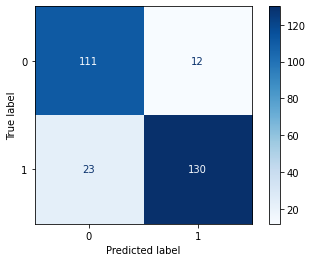

In [16]:
plot_confusion_matrix(classifier, test, test_target['HeartDisease'], cmap=plt.cm.Blues);

По сравнению с бейзлайном, качество на тестовой выборке увеличилось. Сохраним полученную модель.

## Шаг 3: Сохранение обученной модели

In [17]:
with open("model_MLPClassifier.dill", "wb") as f:
    dill.dump(classifier, f)